In [2]:
!pip install matplotlib-label-lines

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.2 MB/s eta 0:00:00


In [1]:
import pandas as pd, ast
arxiv_auc_all = pd.read_csv('/ix/djishnu/Common_Folder/Coauth_Rev/finale3/combined_year_results/auc_aupr/arxiv_compiled_results.csv', converters={'arguments':ast.literal_eval})
arxiv_auc_quad = pd.read_csv('/ix/djishnu/Common_Folder/Coauth_Rev/finale3/combined_year_results/auc_aupr/arxiv_compiled_quad_results.csv', converters={'arguments':ast.literal_eval})

In [2]:
arxiv_auc_all[['year', 'data','component','embedding','model','control']]=pd.DataFrame(arxiv_auc_all['arguments'].tolist(), index=arxiv_auc_all.index)
arxiv_auc_quad[['year', 'data','component','embedding','model','control']]=pd.DataFrame(arxiv_auc_quad['arguments'].tolist(), index=arxiv_auc_quad.index)

In [3]:
def df_filter (df, component = None, embedding = None, model = None, control = None, country = None):
    if component is not None:
        df = df[df['component']==component]
    if embedding is not None:
        df = df[df['embedding']==embedding]
    if model is not None:
        df = df[df['model']==model]
    if control is not None:
        df = df[df['control']==control]
    if control is None:
        df = df[df['control'].isnull()]
    if country is not None:
        df = df[df['country']==country]

    df['AUC'] = np.where(df['AUC'] < 0.5, 1 - df['AUC'], df['AUC'])
    df['AUPR'] = np.where(df['AUPR'] < 0.5, 1 - df['AUPR'], df['AUPR'])
    return df

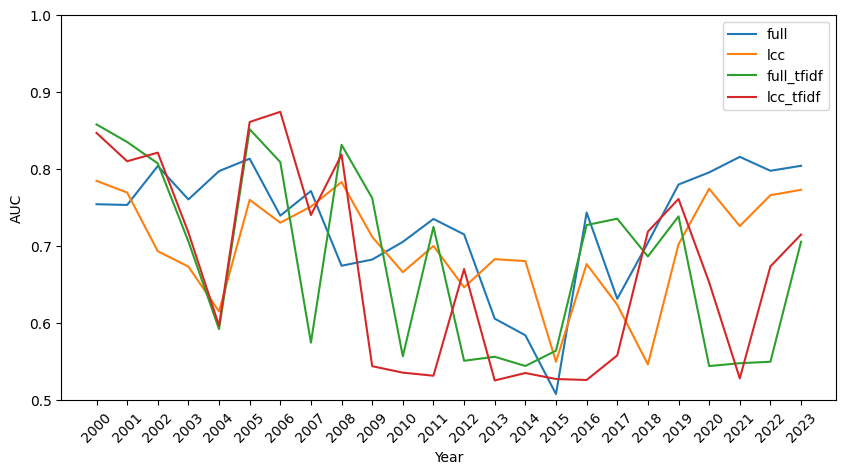

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
arxiv_full_bert_gat=df_filter(arxiv_auc_all, component='full', embedding='bert', model='gat')
arxiv_lcc_bert_gat=df_filter(arxiv_auc_all, component='lcc', embedding='bert', model='gat')
arxiv_full_tfidf_gat=df_filter(arxiv_auc_all, component='full', embedding='tfidf', model='gat')
arxiv_lcc_tfidf_gat=df_filter(arxiv_auc_all, component='lcc', embedding='tfidf', model='gat')
arxiv_full_bert_gat = arxiv_full_bert_gat.sort_values(by='year')
plt.plot(arxiv_full_bert_gat['year'], arxiv_full_bert_gat['AUC'], label='full')
plt.plot(arxiv_full_bert_gat['year'], arxiv_lcc_bert_gat['AUC'], label='lcc')
plt.plot(arxiv_full_bert_gat['year'], arxiv_full_tfidf_gat['AUC'], label='full_tfidf')
plt.plot(arxiv_full_bert_gat['year'], arxiv_lcc_tfidf_gat['AUC'], label='lcc_tfidf')

plt.xlabel('Year')
plt.ylabel('AUC')
plt.legend()
plt.xticks(rotation = 45)
plt.ylim(0.5, 1)
plt.show()


In [7]:
arxiv_full_bert_zeroshot

,arguments,country,AUC,AUPR,year,data,component,embedding,model,control
12,"(2000, arxiv, full, bert, zeroshot)",ALL,0.985892,0.987673,2000,arxiv,full,bert,zeroshot,None
80,"(2001, arxiv, full, bert, zeroshot)",ALL,0.983397,0.985482,2001,arxiv,full,bert,zeroshot,None
74,"(2002, arxiv, full, bert, zeroshot)",ALL,0.985636,0.987436,2002,arxiv,full,bert,zeroshot,None
19,"(2003, arxiv, full, bert, zeroshot)",ALL,0.990224,0.991335,2003,arxiv,full,bert,zeroshot,None
25,"(2004, arxiv, full, bert, zeroshot)",ALL,0.990547,0.991570,2004,arxiv,full,bert,zeroshot,None
238,"(2005, arxiv, full, bert, zeroshot)",ALL,0.991877,0.992678,2005,arxiv,full,bert,zeroshot,None
239,"(2006, arxiv, full, bert, zeroshot)",ALL,0.990601,0.991559,2006,arxiv,full,bert,zeroshot,None
41,"(2007, arxiv, full, bert, zeroshot)",ALL,0.739702,0.641718,2007,arxiv,full,bert,zeroshot,None
52,"(2008, arxiv, full, bert, zeroshot)",ALL,0.516794,0.503727,2008,arxiv,full,bert,zeroshot,None
330,"(2009, arxiv, full, bert, zeroshot)",ALL,0.588063,0.563796,2009,arxiv,full,bert,zeroshot,None


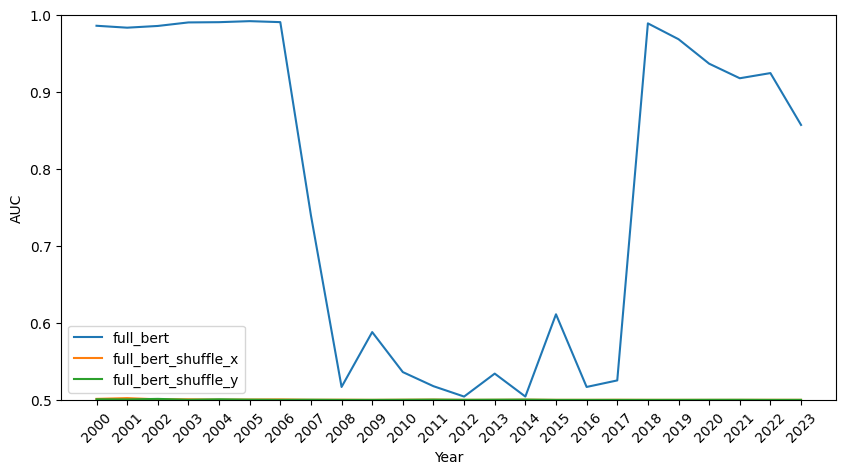

In [8]:
plt.figure(figsize=(10, 5))
arxiv_full_bert_zeroshot=df_filter(arxiv_auc_all, component='full', embedding='bert', model='zeroshot')
# arxiv_lcc_bert_zeroshot=df_filter(arxiv_auc_all, component='lcc', embedding='bert', model='zeroshot')
arxiv_full_tfidf_zeroshot=df_filter(arxiv_auc_all, component='full', embedding='bert', model='zeroshot', control='shuffle_x')
arxiv_lcc_tfidf_zeroshot=df_filter(arxiv_auc_all, component='full', embedding='bert', model='zeroshot', control='shuffle_y')
arxiv_full_bert_zeroshot = arxiv_full_bert_zeroshot.sort_values(by='year')
plt.plot(arxiv_full_bert_zeroshot['year'], arxiv_full_bert_zeroshot['AUC'], label='full_bert')
plt.plot(arxiv_full_bert_zeroshot['year'], arxiv_full_tfidf_zeroshot['AUC'], label='full_bert_shuffle_x')
plt.plot(arxiv_full_bert_zeroshot['year'], arxiv_lcc_tfidf_zeroshot['AUC'], label='full_bert_shuffle_y')

plt.xlabel('Year')
plt.ylabel('AUC')
plt.legend()
plt.xticks(rotation = 45)
plt.ylim(0.5, 1)
plt.show()

In [11]:
import pandas as pd, ast
openalex_auc_all = pd.read_csv('/ix/djishnu/Common_Folder/Coauth_Rev/finale3/combined_year_results/auc_aupr/openalex_compiled_results.csv', converters={'arguments':ast.literal_eval})
openalex_auc_quad = pd.read_csv('/ix/djishnu/Common_Folder/Coauth_Rev/finale3/combined_year_results/auc_aupr/openalex_compiled_quad_results.csv', converters={'arguments':ast.literal_eval})

In [13]:
openalex_auc_all[['year', 'data','component','embedding','model','control']]=pd.DataFrame(openalex_auc_all['arguments'].tolist(), index=openalex_auc_all.index)
openalex_auc_quad[['year', 'data','component','embedding','model','control']]=pd.DataFrame(openalex_auc_quad['arguments'].tolist(), index=openalex_auc_quad.index)


In [15]:
openalex_auc_all

,arguments,country,AUC,AUPR,year,data,component,embedding,model,control
0,"(2000, openalex, full, tfidf, zeroshot)",ALL,0.993278,0.993437,2000,openalex,full,tfidf,zeroshot,None
1,"(2000, openalex, full, tfidf, zeroshot)",IN,0.990335,0.990905,2000,openalex,full,tfidf,zeroshot,None
2,"(2002, openalex, lcc, bert, gat)",ALL,0.884731,0.904102,2002,openalex,lcc,bert,gat,None
3,"(2003, openalex, full, tfidf, zeroshot)",IN,0.989351,0.990442,2003,openalex,full,tfidf,zeroshot,None
4,"(2003, openalex, full, tfidf, gat)",ALL,0.935815,0.948950,2003,openalex,full,tfidf,gat,None
...,...,...,...,...,...,...,...,...,...,...
1723,"(2023, openalex, lcc, tfidf, zeroshot)",ALL,0.998334,0.998256,2023,openalex,lcc,tfidf,zeroshot,None
1724,"(2023, openalex, full, bert, gat_graph_embed)",ALL,0.872216,0.907859,2023,openalex,full,bert,gat_graph_embed,None
1725,"(2023, openalex, lcc, bert, gat_graph_embed, s...",ALL,0.499990,0.499999,2023,openalex,lcc,bert,gat_graph_embed,shuffle_x
1726,"(2023, openalex, lcc, bert, zeroshot)",ALL,0.998921,0.998808,2023,openalex,lcc,bert,zeroshot,None


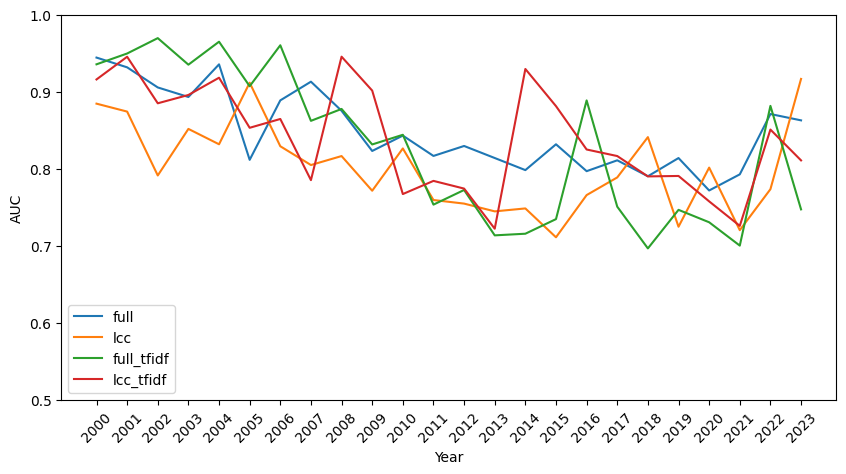

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
openalex_full_bert_gat=df_filter(openalex_auc_all, component='full', embedding='bert', model='gat', country='ALL')
openalex_lcc_bert_gat=df_filter(openalex_auc_all, component='lcc', embedding='bert', model='gat', country='ALL')
openalex_full_tfidf_gat=df_filter(openalex_auc_all, component='full', embedding='tfidf', model='gat', country='ALL')
openalex_lcc_tfidf_gat=df_filter(openalex_auc_all, component='lcc', embedding='tfidf', model='gat', country='ALL')
openalex_full_bert_gat = openalex_full_bert_gat.sort_values(by='year')
plt.plot(openalex_full_bert_gat['year'], openalex_full_bert_gat['AUC'], label='full')
plt.plot(openalex_full_bert_gat['year'], openalex_lcc_bert_gat['AUC'], label='lcc')
plt.plot(openalex_full_bert_gat['year'], openalex_full_tfidf_gat['AUC'], label='full_tfidf')
plt.plot(openalex_full_bert_gat['year'], openalex_lcc_tfidf_gat['AUC'], label='lcc_tfidf')

plt.xlabel('Year')
plt.ylabel('AUC')
plt.legend()
plt.xticks(rotation = 45)
plt.ylim(0.5, 1)
plt.show()

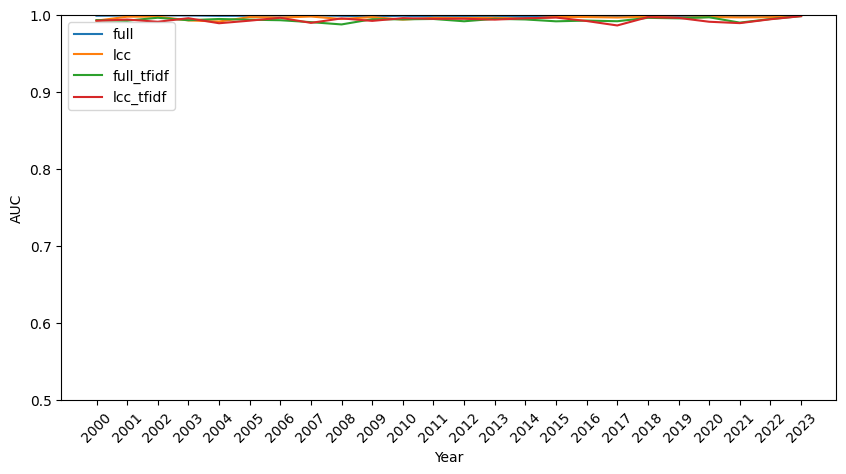

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
openalex_full_bert_zeroshot=df_filter(openalex_auc_all, component='full', embedding='bert', model='zeroshot', country='ALL')
openalex_lcc_bert_zeroshot=df_filter(openalex_auc_all, component='lcc', embedding='bert', model='zeroshot', country='ALL')
openalex_full_tfidf_zeroshot=df_filter(openalex_auc_all, component='full', embedding='tfidf', model='zeroshot', country='ALL')
openalex_lcc_tfidf_zeroshot=df_filter(openalex_auc_all, component='lcc', embedding='tfidf', model='zeroshot', country='ALL')
openalex_full_bert_zeroshot = openalex_full_bert_zeroshot.sort_values(by='year')
plt.plot(openalex_full_bert_zeroshot['year'], openalex_full_bert_zeroshot['AUC'], label='full')
plt.plot(openalex_full_bert_zeroshot['year'], openalex_lcc_bert_zeroshot['AUC'], label='lcc')
plt.plot(openalex_full_bert_zeroshot['year'], openalex_full_tfidf_zeroshot['AUC'], label='full_tfidf')
plt.plot(openalex_full_bert_zeroshot['year'], openalex_lcc_tfidf_zeroshot['AUC'], label='lcc_tfidf')

plt.xlabel('Year')
plt.ylabel('AUC')
plt.legend()
plt.xticks(rotation = 45)
plt.ylim(0.5, 1)
plt.show()

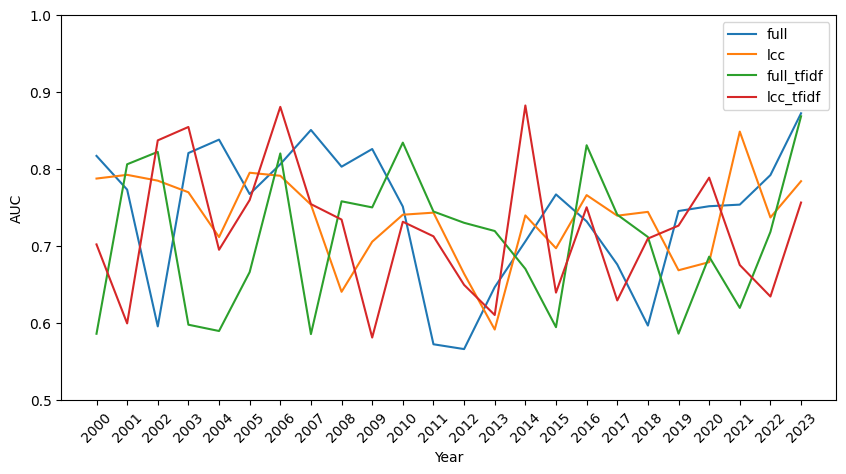

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
openalex_full_bert_gat_graph_embed=df_filter(openalex_auc_all, component='full', embedding='bert', model='gat_graph_embed', country='ALL')
openalex_lcc_bert_gat_graph_embed=df_filter(openalex_auc_all, component='lcc', embedding='bert', model='gat_graph_embed', country='ALL')
openalex_full_tfidf_gat_graph_embed=df_filter(openalex_auc_all, component='full', embedding='tfidf', model='gat_graph_embed', country='ALL')
openalex_lcc_tfidf_gat_graph_embed=df_filter(openalex_auc_all, component='lcc', embedding='tfidf', model='gat_graph_embed', country='ALL')
openalex_full_bert_gat_graph_embed = openalex_full_bert_gat_graph_embed.sort_values(by='year')
plt.plot(openalex_full_bert_gat_graph_embed['year'], openalex_full_bert_gat_graph_embed['AUC'], label='full')
plt.plot(openalex_full_bert_gat_graph_embed['year'], openalex_lcc_bert_gat_graph_embed['AUC'], label='lcc')
plt.plot(openalex_full_bert_gat_graph_embed['year'], openalex_full_tfidf_gat_graph_embed['AUC'], label='full_tfidf')
plt.plot(openalex_full_bert_gat_graph_embed['year'], openalex_lcc_tfidf_gat_graph_embed['AUC'], label='lcc_tfidf')

plt.xlabel('Year')
plt.ylabel('AUC')
plt.legend()
plt.xticks(rotation = 45)
plt.ylim(0.5, 1)
plt.show()